In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('../../outputs/final.json', 'r') as f:
    data = json.load(f)

In [3]:
attribute_list = ['Name'] + list(data[list(data.keys())[0]].keys())

reoriented_data = {attr:[] for attr in attribute_list}

for player, attributes in data.items():
    reoriented_data['Name'].append(player)
    for attribute, value in attributes.items():
        reoriented_data[attribute].append(value)

df = pd.DataFrame(reoriented_data)

df.head(10)


,Name,Id,Nationality,Date Of Birth,Position,Appearances,Wins,Losses,Saves,Penalties Saved,...,Date Of Death,Participant In,Place Of Death,As.Com Athlete Id,Work Period (End),Educated At,Sport Number,Owner Of,"Languages Spoken, Written Or Signed",Topic'S Main Category
0,Vincent Weijl,3782,None,DOB Not Available,Forward,0,0,0,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
1,Gabriel Martinelli,66104,Brazil,18/06/2001,Forward,33,13,8,NaN,NaN,...,None,football at the 2020 Summer Olympics – men's t...,None,martinelli/46190,None,None,None,None,Portuguese,None
2,Darren Bent,2098,England,06/02/1984,Forward,276,79,119,NaN,NaN,...,None,"[2002–03 FA Cup, 2004–05 Football League Champ...",None,None,2018-01-01T00:00:00Z,None,None,None,English,None
3,J'Neil Bennett,31662,England,07/12/2001,Midfielder,0,0,0,NaN,NaN,...,None,None,None,None,None,None,None,None,English,None
4,Spencer Prior,732,England,22/04/1971,Defender,169,49,72,NaN,NaN,...,None,None,None,None,None,None,None,None,English,None
5,Mark Delaney,1504,Wales,13/05/1976,Defender,158,54,54,NaN,NaN,...,None,None,None,None,None,None,None,None,English,None
6,Gary Montgomery,1684,England,10/08/1982,Goalkeeper,0,0,0,0.0,0.0,...,None,None,None,None,None,None,None,None,English,None
7,Warren Barton,590,England,19/03/1969,Defender,277,110,98,NaN,NaN,...,None,None,None,None,None,None,None,None,English,None
8,Andy Barlow,418,England,24/11/1965,Defender,12,2,4,NaN,NaN,...,None,None,None,None,None,None,None,None,English,None
9,John Oster,1401,Wales,08/12/1978,Midfielder,104,28,53,NaN,NaN,...,None,None,None,None,None,None,None,None,English,None


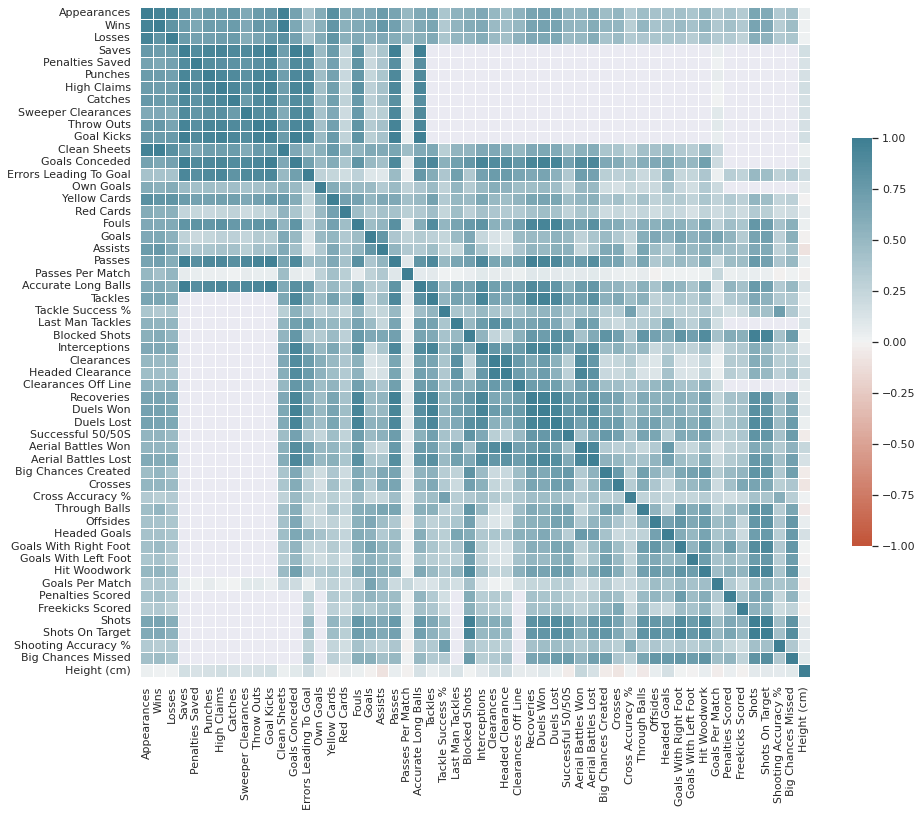

In [5]:
numeric_attributes = ['Appearances', 'Wins', 'Losses', 'Saves', 'Penalties Saved', 'Punches', 'High Claims', 'Catches', 'Sweeper Clearances', 'Throw Outs', 'Goal Kicks', 'Clean Sheets', 'Goals Conceded', 'Errors Leading To Goal', 'Own Goals', 'Yellow Cards', 'Red Cards', 'Fouls', 'Goals', 'Assists', 'Passes', 'Passes Per Match', 'Accurate Long Balls', 'Tackles', 'Tackle Success %', 'Last Man Tackles', 'Blocked Shots', 'Interceptions', 'Clearances',
                      'Headed Clearance', 'Clearances Off Line', 'Recoveries', 'Duels Won', 'Duels Lost', 'Successful 50/50S', 'Aerial Battles Won', 'Aerial Battles Lost', 'Big Chances Created', 'Crosses', 'Cross Accuracy %', 'Through Balls', 'Offsides', 'Headed Goals', 'Goals With Right Foot', 'Goals With Left Foot', 'Hit Woodwork', 'Goals Per Match', 'Penalties Scored', 'Freekicks Scored', 'Shots', 'Shots On Target', 'Shooting Accuracy %', 'Big Chances Missed', 'Height (cm)']

corr = df[numeric_attributes].corr()

sns.set(rc={'figure.figsize': (15, 15)})

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=.5, cbar_kws={"shrink": .5}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right',
    ha='center'
)

plt.show()


In [8]:
non_numeric_attributes = [col for col in df.columns if col not in numeric_attributes]

In [13]:
print(f"Numeric Attributes: {', '.join(numeric_attributes)}")
print()
print(f"Non Numeric Attributes: {', '.join(non_numeric_attributes)}")

Numeric Attributes: Appearances, Wins, Losses, Saves, Penalties Saved, Punches, High Claims, Catches, Sweeper Clearances, Throw Outs, Goal Kicks, Clean Sheets, Goals Conceded, Errors Leading To Goal, Own Goals, Yellow Cards, Red Cards, Fouls, Goals, Assists, Passes, Passes Per Match, Accurate Long Balls, Tackles, Tackle Success %, Last Man Tackles, Blocked Shots, Interceptions, Clearances, Headed Clearance, Clearances Off Line, Recoveries, Duels Won, Duels Lost, Successful 50/50S, Aerial Battles Won, Aerial Battles Lost, Big Chances Created, Crosses, Cross Accuracy %, Through Balls, Offsides, Headed Goals, Goals With Right Foot, Goals With Left Foot, Hit Woodwork, Goals Per Match, Penalties Scored, Freekicks Scored, Shots, Shots On Target, Shooting Accuracy %, Big Chances Missed, Height (cm)

Non Numeric Attributes: Name, Id, Nationality, Date Of Birth, Position, Club, Occupation, Place Of Birth, Country Of Citizenship, Member Of Sports Team, Worldfootball.Net Player Id, Soccerway Play